**Preliminary exploratory data analysis.**

The nucleus (from the point of view of microbiology) is a cellular organoid (a constant component of a cell necessary for its existence; also an organelle), in which genetic information is stored in the form of a DNA molecule. Processes such as DNA replication (doubling) and transcription - the transfer of genetic information from DNA to RNA - take place in the nucleus.
Nuclear envelope, nuclear lamina and nuclear pores
The nucleus is separated from the cytoplasm by a nuclear envelope formed due to the expansion and fusion of the endoplasmic reticulum cisterns with each other in such a way that double walls are formed in the nucleus due to the narrow compartments surrounding it.

In [ ]:
import pathlib
import imageio
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

from skimage.io import imread, imshow
from scipy import ndimage
# Glob the training data and load a single image path
train_paths = pathlib.Path(r'C:\Users\user\PycharmProjects\project_quantum\data\stage1_train').glob('*/images/*.png')
train_sort = sorted([x for x in train_paths])
im_path = train_sort[7]
im = imageio.imread(str(im_path))
# Print the image dimensions
print('Original image shape: {}'.format(im.shape))

# Coerce the image into grayscale format (if not already)
im_gray = rgb2gray(im)
print('New image shape: {}'.format(im_gray.shape))
im_gray = np.expand_dims(im_gray, axis = -1)
print('New image shape for training: {}'.format(im_gray.shape))
cv2.imshow('Image_train', im_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
thresh_val = threshold_otsu(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)
# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)
plt.hist(mask.ravel(),256,[0,2])
plt.show()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here
histogram, bin_edges = np.histogram(im_gray, bins=256, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()
# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0)
# closing all open windows
cv2.destroyAllWindows()


labels, nlabels = ndimage.label(mask)

label_arrays = []
for label_num in range(1, nlabels + 1):
    label_mask = np.where(labels == label_num, 1, 0)
    label_arrays.append(label_mask)

print('There are {} separate components / objects detected.'.format(nlabels))
objects = []
plt.figure(figsize=(10,10))

for label_ind, label_coords in enumerate(ndimage.find_objects(labels)):
    cell = im_gray[label_coords]
    print(cell.shape)
    objects.append(cell)


    # Check if the label size is too small
    if np.product(cell.shape) < 10:
        print('Label {} is too small! Setting to 0.'.format(label_ind))
        mask = np.where(labels == label_ind + 1, 0, mask)
    else:
        plt.subplot(5, 5, label_ind+1)
        plt.imshow(np.squeeze(cell))
plt.show()
# print(objects)
# Regenerate the labels
labels, nlabels = ndimage.label(mask)
print('There are now {} separate components / objects detected.'.format(nlabels))


Original image shape: (360, 360, 4)
New image shape: (360, 360)
New image shape for training: (360, 360, 1)

There are 22 separate components / objects detected.

(16, 20, 1)

(7, 22, 1)

(25, 49, 1)

(61, 45, 1)

(1, 1, 1)

Label 4 is too small! Setting to 0.

(1, 1, 1)

Label 5 is too small! Setting to 0.

(38, 13, 1)

(60, 42, 1)

(58, 46, 1)

(43, 50, 1)

(89, 79, 1)

(70, 55, 1)

(33, 57, 1)

(70, 46, 1)

(58, 36, 1)

(42, 51, 1)

(42, 30, 1)

(80, 58, 1)

(38, 115, 1)

(32, 36, 1)

(1, 5, 1)

Label 20 is too small! Setting to 0.

(1, 1, 1)

Label 21 is too small! Setting to 0.
There are now 18 separate components / objects detected.

Process finished with exit code 0


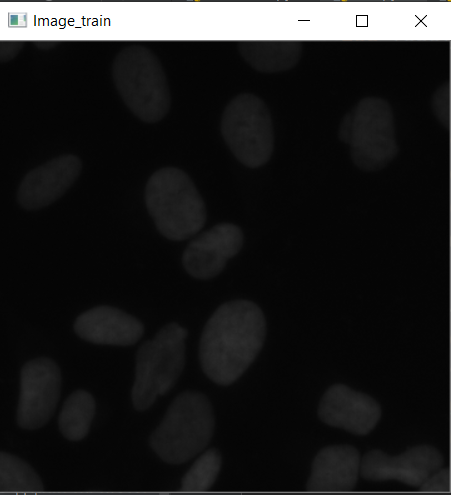

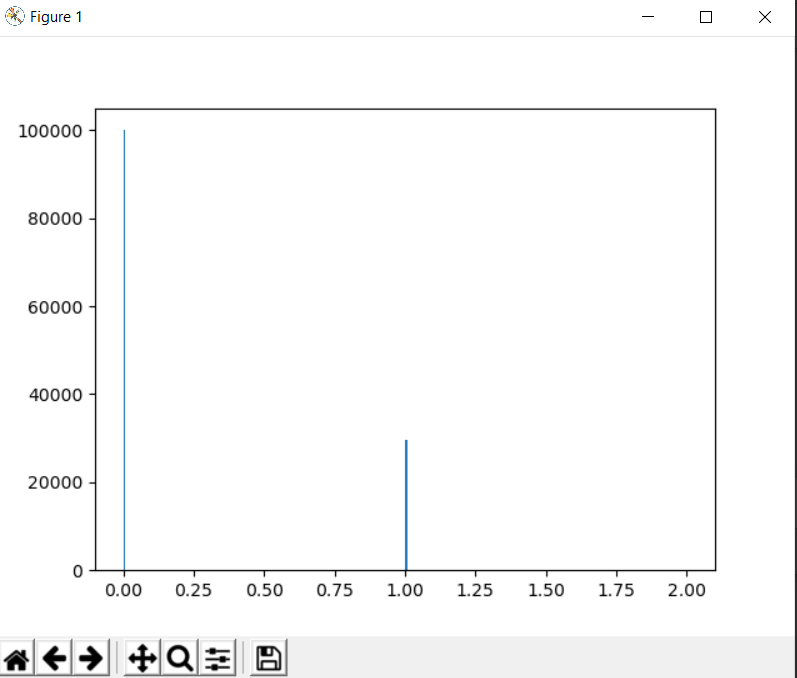

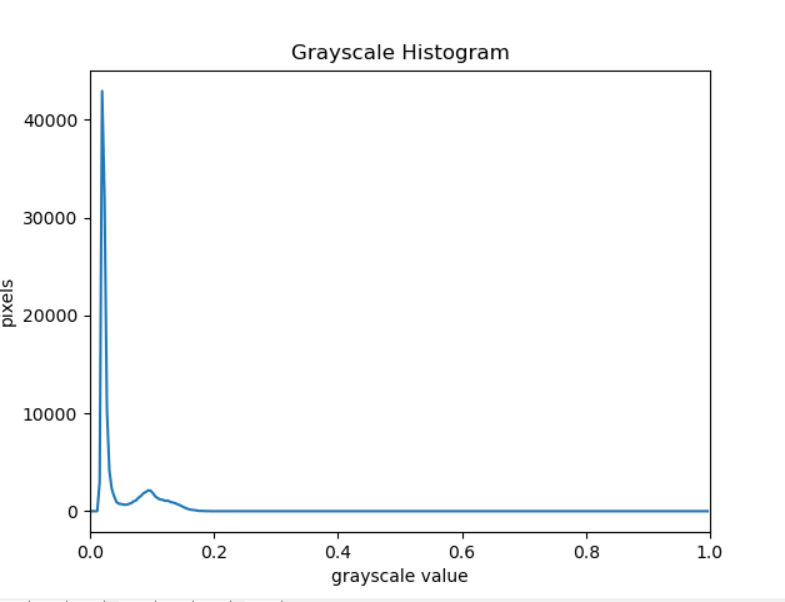

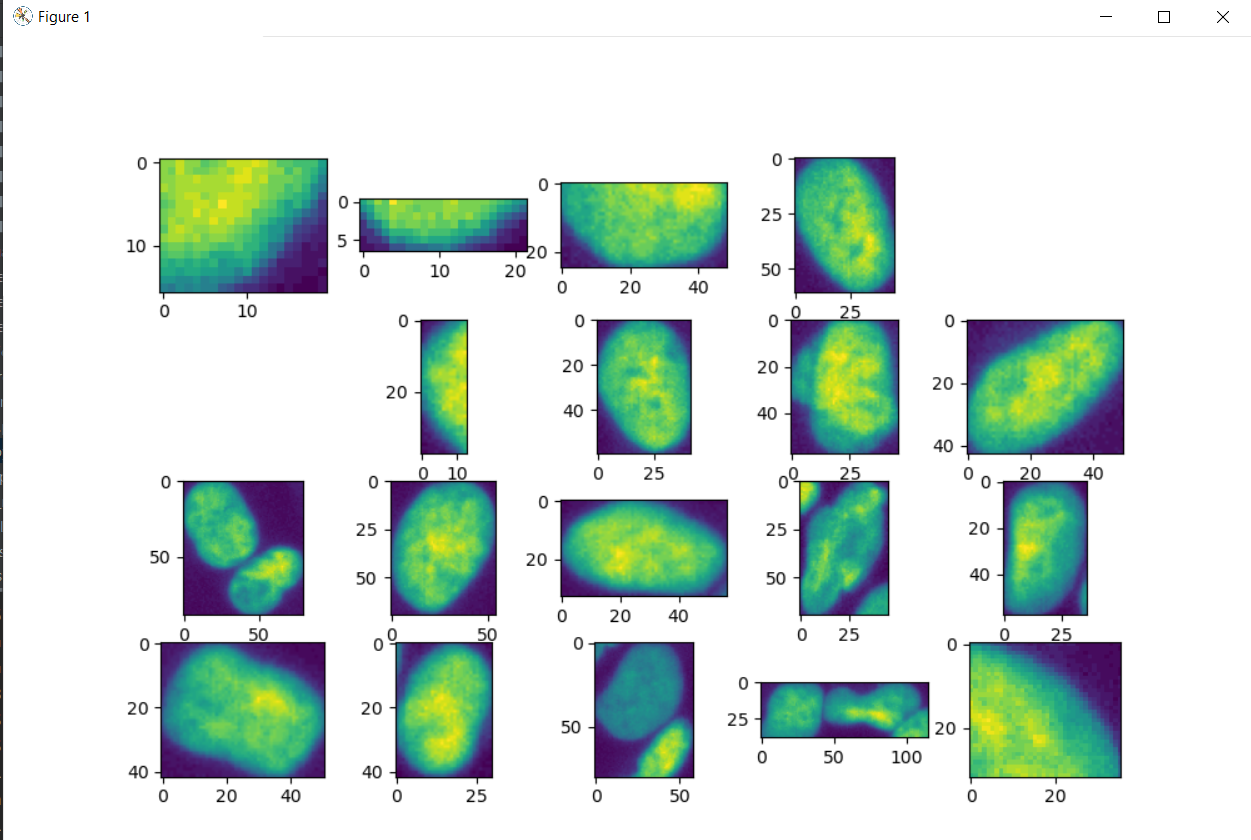

When calculating the average value of the black and white areas in the image, we see that on average there are more white areas of the nuclei than the black background, therefore, when designing a network, we allow a sufficiently large step size. However, our kernels are relatively small, so we need to apply small filters. When objects were found in the images, there were several objects that are not involved in processing, Therefore, with further training and in the case of retraining the model, it will be possible to try to delete insignificant small kernels, if necessary.